In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

### This is a sample of 1 row with headers explanation:

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0

**step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** - amount of the transaction in local currency.

**nameOrig** - customer who started the transaction

**oldbalanceOrg** - initial balance before the transaction

**newbalanceOrig** - new balance after the transaction.

**nameDest** - customer who is the recipient of the transaction

**oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

**newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

**isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

**isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [2]:
data = pd.read_csv("data/Synthetic_fraud_detection.csv")
df = data.copy()

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df['step'].quantile(0.75), df['step'].max()

(np.float64(335.0), np.int64(743))

In [8]:
df['amount'].quantile(0.75), df['amount'].max()

(np.float64(208721.4775), np.float64(92445516.64))

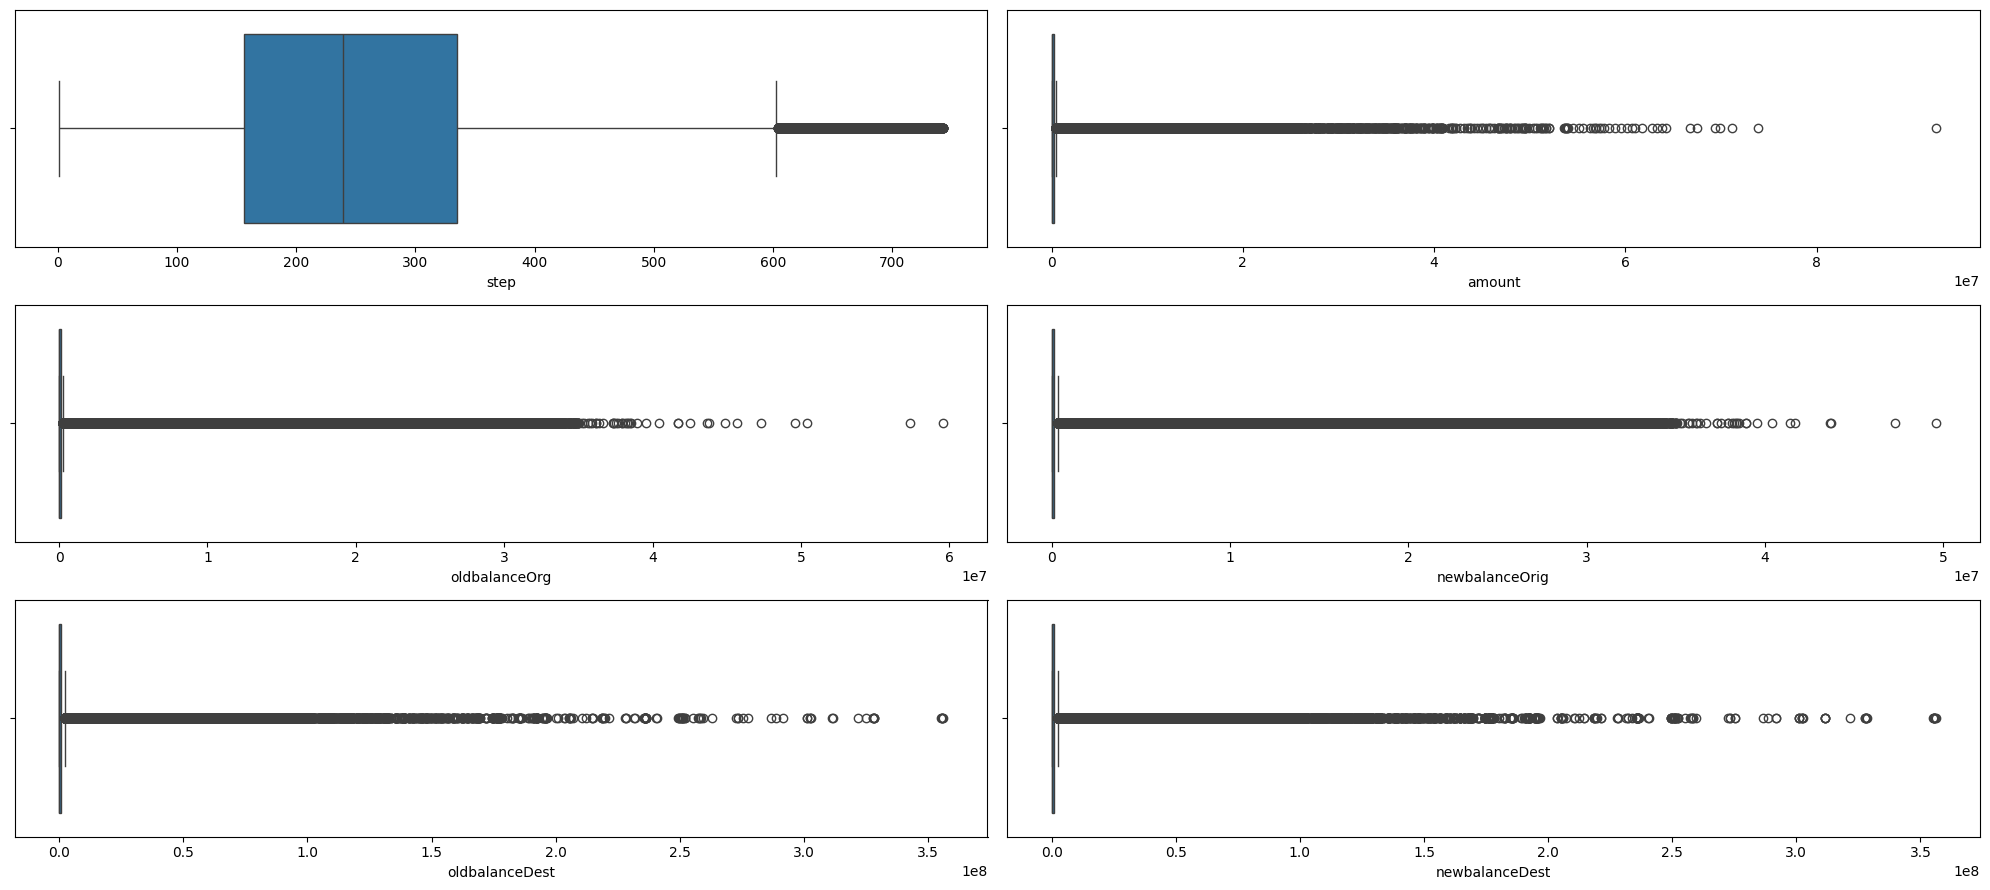

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(20, 9))
sns.boxplot(data=df, x='step', ax=axes[0, 0])
sns.boxplot(data=df, x='amount', ax=axes[0, 1])
sns.boxplot(data=df, x='oldbalanceOrg', ax=axes[1, 0])
sns.boxplot(data=df, x='newbalanceOrig', ax=axes[1, 1])
sns.boxplot(data=df, x='oldbalanceDest', ax=axes[2, 0])
sns.boxplot(data=df, x='newbalanceDest', ax=axes[2, 1])

fig.tight_layout()
plt.show()

In [10]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [12]:
df[df['nameDest'].apply(lambda x: True if 'M' in x else False)]['oldbalanceDest'].unique(), df[df['nameDest'].apply(lambda x: True if 'M' in x else False)]['newbalanceDest'].unique()

(array([0.]), array([0.]))

In [13]:
for column in df.columns:
    print(df[column].isnull().any())

False
False
False
False
False
False
False
False
False
False
False


In [14]:
df['isFraud'].unique(), df['isFlaggedFraud'].unique()

(array([0, 1]), array([0, 1]))

In [15]:
df['isFraud'] = df['isFraud'].astype(bool)

In [16]:
new_fraud = df["isFraud"].astype(bool).value_counts().reset_index()
trans = df.groupby(['type', 'isFraud']).size().unstack()
legit_non = df.groupby('isFraud')['amount'].median()

new_fraud['count'] = new_fraud['count']/1000000
trans[False] = trans[False]/1000000
trans[True] = trans[True]/1000000
legit_non = legit_non/1000
fraud_df = df[df['isFraud']]

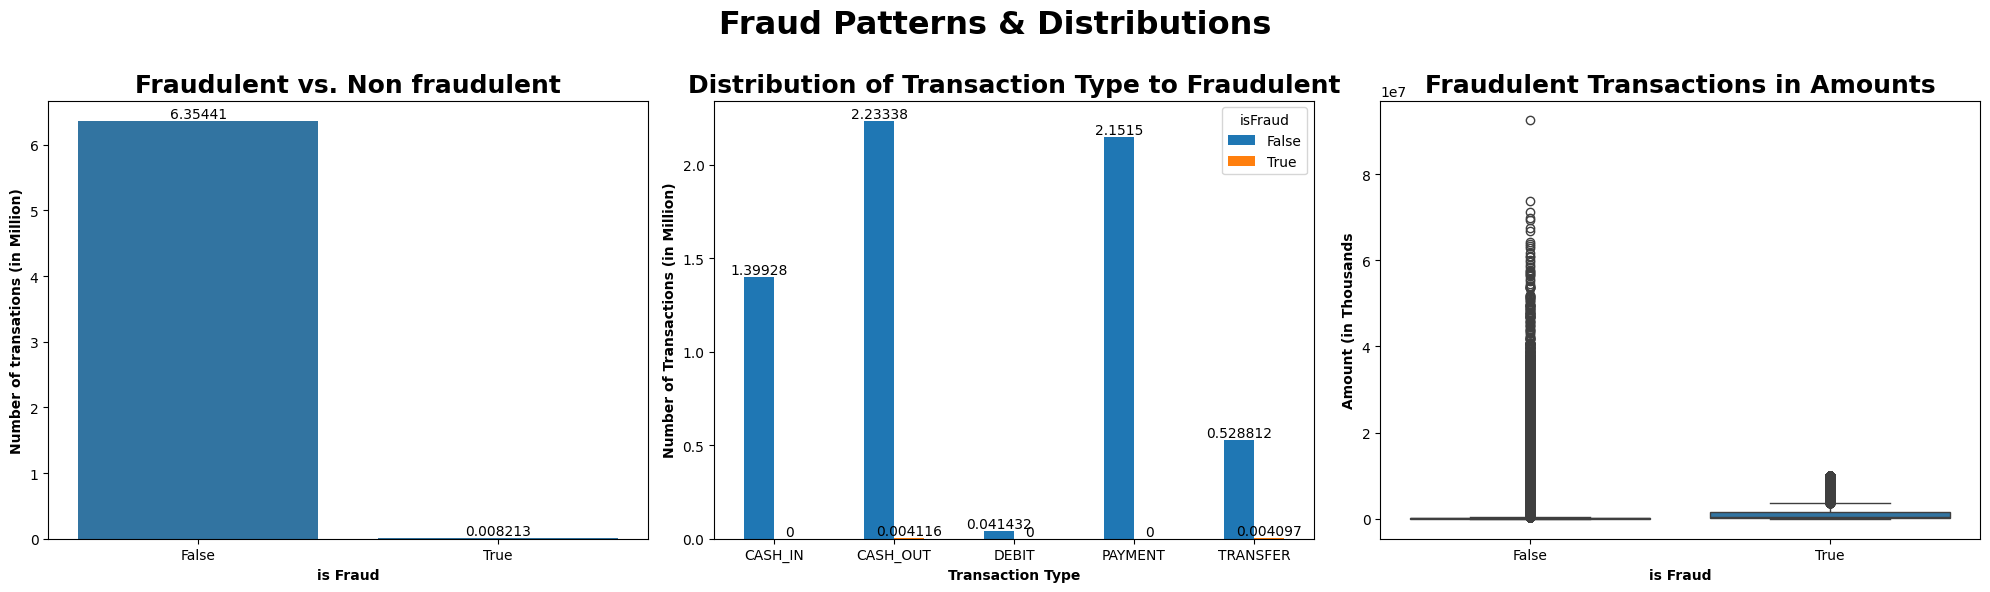

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.barplot(data=new_fraud, x='isFraud', y='count', ax=axes[0])
for index in range(len(new_fraud)):
    try:
        axes[0].bar_label(axes[0].containers[index])  # Fraud is 8213
    except:
        pass
axes[0].set_title("Fraudulent vs. Non fraudulent", fontsize=18, fontweight='bold')
axes[0].set_xlabel("is Fraud", fontweight='bold')
axes[0].set_ylabel("Number of transations (in Million)", fontweight='bold')


trans.plot(kind='bar', ax=axes[1])
for index in range(len(trans)):
    try:
        axes[1].bar_label(axes[1].containers[index], fontsize=10)
    except:
        pass
axes[1].tick_params(axis='x', rotation=0)
axes[1].set_title("Distribution of Transaction Type to Fraudulent", fontweight='bold', fontsize=18)
axes[1].set_xlabel("Transaction Type", fontweight='bold')
axes[1].set_ylabel("Number of Transactions (in Million)", fontweight='bold')


sns.boxplot(data=df, x="isFraud", y='amount', ax=axes[2])
axes[2].set_title("Fraudulent Transactions in Amounts", fontsize=18, fontweight='bold')
axes[2].set_xlabel("is Fraud", fontweight='bold')
axes[2].set_ylabel("Amount (in Thousands", fontweight='bold')

fig.suptitle("Fraud Patterns & Distributions", fontweight='bold', fontsize=23)
fig.tight_layout()
plt.show()

In [18]:
new_df = df[df['isFraud']]

C:\Users\dlami\AppData\Local\Temp\ipykernel_19012\3900906457.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
c:\Users\dlami\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


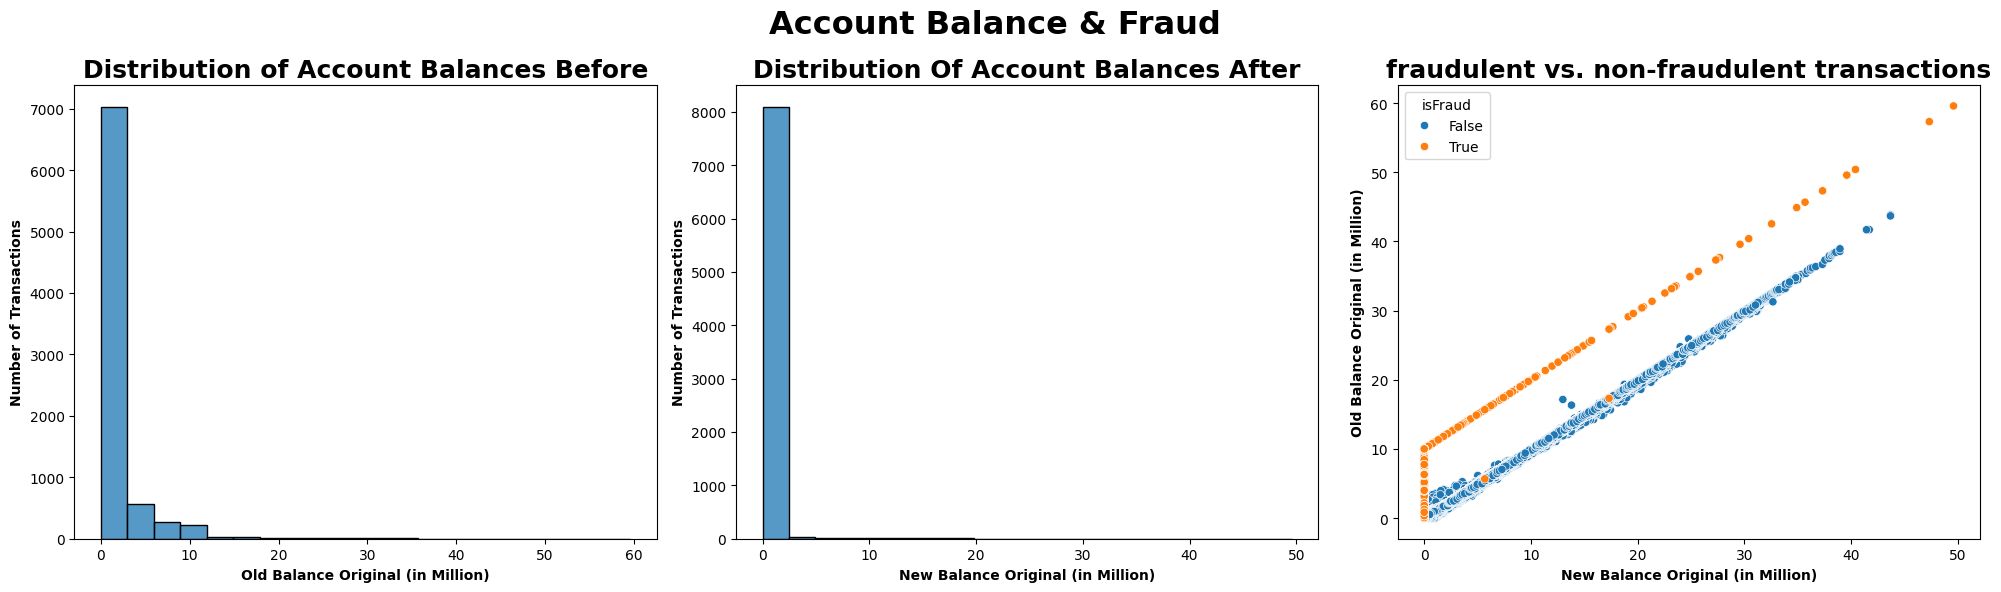

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.histplot(data=new_df, x=new_df['oldbalanceOrg']/1000000, bins=20, ax=axes[0])
axes[0].set_title("Distribution of Account Balances Before", fontsize=18, fontweight='bold')
axes[0].set_xlabel("Old Balance Original (in Million)", fontweight='bold')
axes[0].set_ylabel("Number of Transactions", fontweight='bold')

sns.histplot(data=new_df, x=new_df['newbalanceOrig']/1000000, bins=20, ax=axes[1])
axes[1].set_title("Distribution Of Account Balances After", fontsize=18, fontweight='bold')
axes[1].set_xlabel("New Balance Original (in Million)", fontweight='bold')
axes[1].set_ylabel("Number of Transactions", fontweight='bold')

sns.scatterplot(data=df, x=df['newbalanceOrig']/1000000, y=df['oldbalanceOrg']/1000000, hue='isFraud', ax=axes[2])
axes[2].set_title("fraudulent vs. non-fraudulent transactions", fontsize=18, fontweight='bold')
axes[2].set_xlabel("New Balance Original (in Million)", fontweight='bold')
axes[2].set_ylabel("Old Balance Original (in Million)", fontweight='bold')

fig.suptitle("Account Balance & Fraud", fontsize=23, fontweight='bold')
fig.tight_layout()
plt.show()

In [20]:
type_trans = df[df['isFraud']]["type"].value_counts().reset_index()


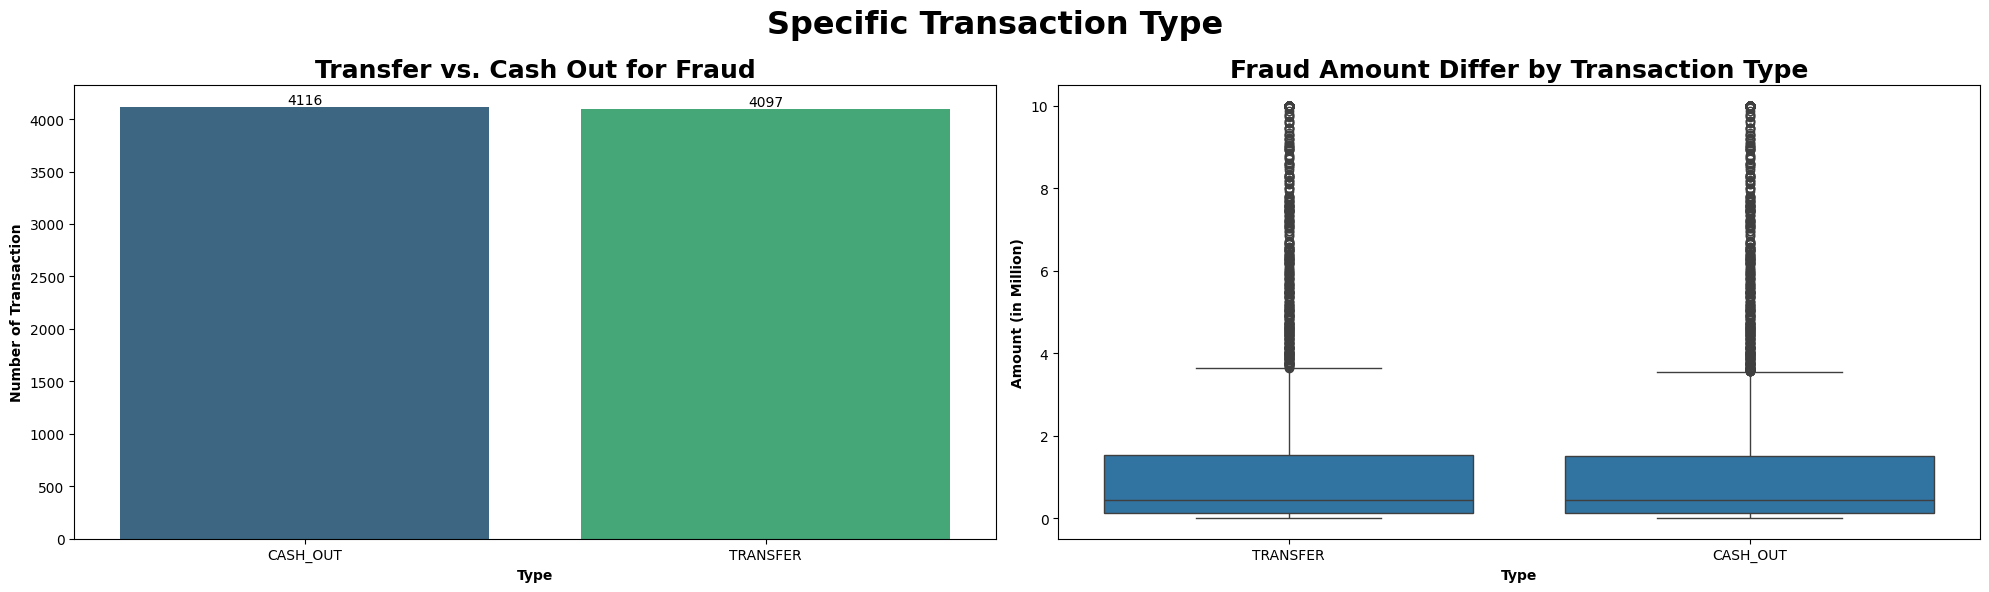

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(data=type_trans, x='type', y='count', ax=axes[0], hue='type', palette='viridis')
axes[0].set_title("Transfer vs. Cash Out for Fraud", fontweight='bold', fontsize=18)
axes[0].set_xlabel("Type", fontweight='bold')
axes[0].set_ylabel("Number of Transaction", fontweight='bold')

for index in range(len(type_trans)):
    try:
        axes[0].bar_label(axes[0].containers[index])
    except:
        pass

sns.boxplot(data=fraud_df, x='type', y=fraud_df['amount']/1000000, ax=axes[1])
axes[1].set_title("Fraud Amount Differ by Transaction Type", fontweight='bold', fontsize=18)
axes[1].set_xlabel("Type", fontweight='bold')
axes[1].set_ylabel("Amount (in Million)", fontweight='bold')

fig.suptitle("Specific Transaction Type", fontweight='bold', fontsize=23)
fig.tight_layout()
plt.show()

In [22]:
flag_fraud = fraud_df['isFlaggedFraud'].value_counts().reset_index()
flag_fraud['isFlaggedFraud'] = flag_fraud['isFlaggedFraud'].astype(bool)

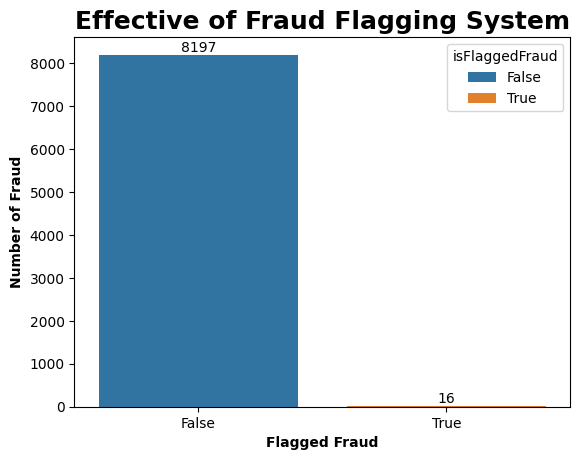

In [23]:
axes = sns.barplot(data=flag_fraud, x='isFlaggedFraud', y='count', hue='isFlaggedFraud')

for index in range(len(flag_fraud)):
    try:
        axes.bar_label(axes.containers[index])
    except:
        pass

plt.title("Effective of Fraud Flagging System", fontweight='bold', fontsize=18)
plt.xlabel("Flagged Fraud", fontweight='bold')
plt.ylabel("Number of Fraud", fontweight='bold')
plt.show()

In [24]:
fraud_df['nameDest'].str[0].unique()

array(['C'], dtype=object)

In [25]:
###### nameM = fraud_df[fraud_df['nameDest'].apply(lambda x: True if x[0] == 'M' else False)]
nameC = fraud_df[fraud_df['nameDest'].apply(lambda x: True if x[0] == 'C' else False)]

total_name = pd.Series(
    {"C_Name": nameC['amount'].sum(), 'M_Name': 0}
)/1000000000
total_name = total_name.reset_index()

In [26]:
aver_type = df.groupby(["type", "isFraud"])['amount'].mean().unstack()
aver_type[False] = aver_type[False]/1000
aver_type[True] = aver_type[True]/1000



In [27]:
nameC['nameOrig'].str[0].unique()

array(['C'], dtype=object)

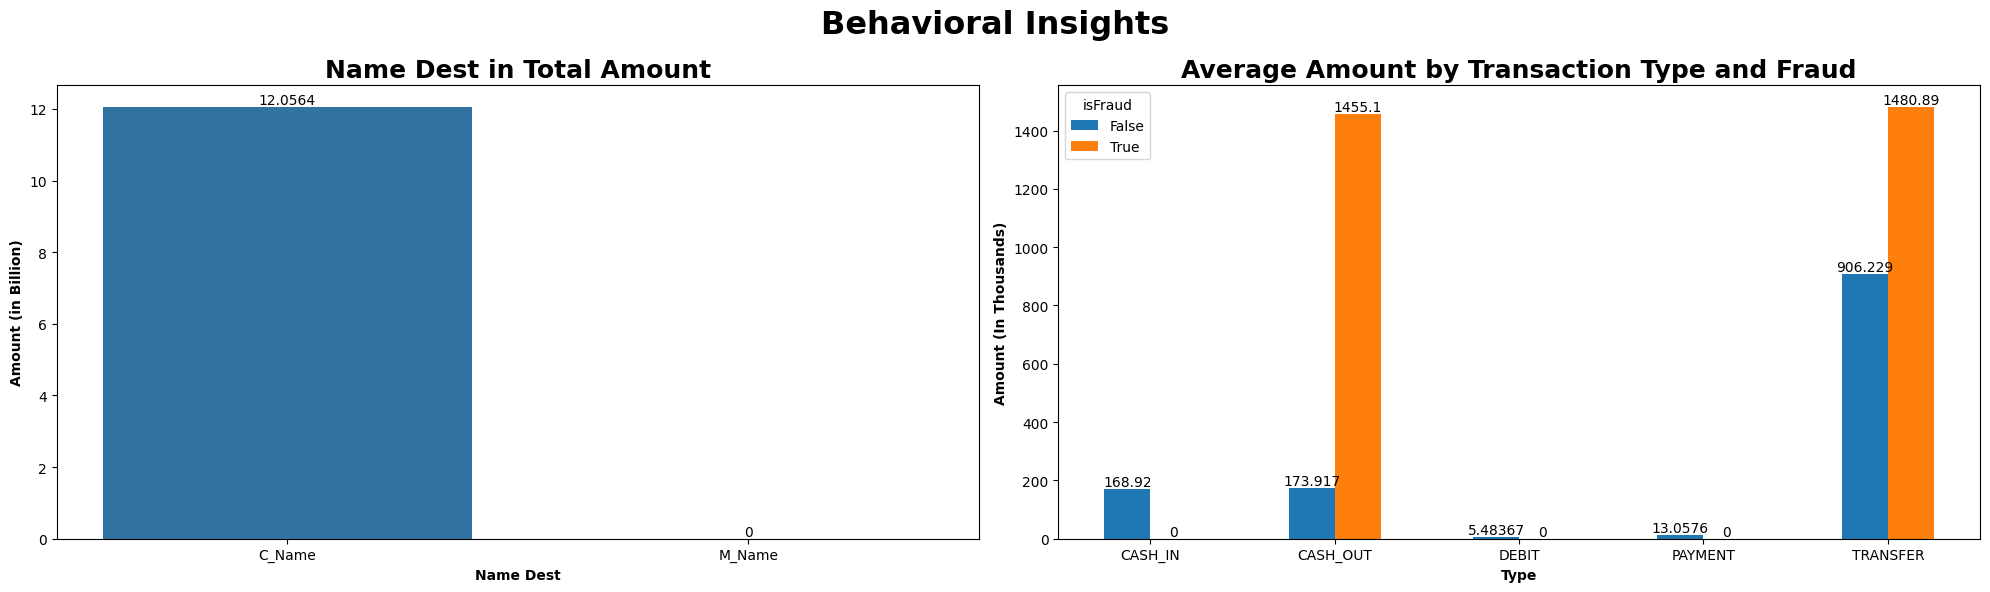

In [28]:
fig, axis = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(data=total_name, x="index", y=0, ax=axis[0])
for index in range(len(total_name)):
    try:
        axis[0].bar_label(axis[0].containers[index])
    except:
        pass
axis[0].set_title("Name Dest in Total Amount", fontweight='bold', fontsize=18)
axis[0].set_xlabel('Name Dest', fontweight='bold')
axis[0].set_ylabel("Amount (in Billion)", fontweight='bold')

aver_type.plot(kind='bar', ax=axis[1])
axis[1].tick_params(axis='x', rotation=0)
axis[1].set_title("Average Amount by Transaction Type and Fraud", fontweight='bold', fontsize=18)
axis[1].set_xlabel("Type", fontweight='bold')
axis[1].set_ylabel('Amount (In Thousands)', fontweight='bold')

for index in range(len(aver_type)):
    try:
        axis[1].bar_label(axis[1].containers[index])
    except:
        pass

fig.suptitle("Behavioral Insights", fontweight='bold', fontsize=23)
fig.tight_layout()
plt.show()

# Fraud Detection Insights – Analysis Report

## Summary Insights

Our fraud detection analysis revealed several compelling patterns. Out of over 6.3 million transactions, only a tiny fraction—about 8,213—were identified as fraudulent. While most transaction types are legitimate across the board, two types—**Cash Out** and **Transfer**—stood out as the only ones associated with fraud. 

Interestingly, fraudulent transactions often involve accounts with very high balances, particularly those above 10 million, forming a stark contrast against the majority of legitimate accounts, which have significantly lower balances. Also, a deeper look into the recipient account names revealed that fraudulent activity overwhelmingly involved accounts starting with the letter **"C"**, handling over **12 billion** in suspicious transactions—whereas names starting with **"M"** had none.

Lastly, our fraud flagging system appears highly efficient, catching only 16 fraudulent cases but letting through over 8,000, signaling that most fraud slips through undetected—but at an impressively low rate, considering the scale.

---

## Full Insights

### Fraud Patterns & Distributions

1. **Fraudulent vs. Non-Fraudulent Transactions**
   - Non-fraudulent transactions dominate the dataset with **6.3 million** transactions.
   - Fraudulent transactions are significantly fewer at **8,213**.

2. **Transaction Type Distribution**
   - Non-fraudulent transactions are spread across all transaction types: `Cash In`, `Cash Out`, `Debit`, `Payment`, and `Transfer`.
   - Fraud is observed **only** in:
     - **Cash Out**: 2.2 million non-fraud, **4,116 fraud**
     - **Transfer**: 528,812 non-fraud, **4,097 fraud**
   - No fraudulent transactions were detected in `Payment`, `Cash In`, or `Debit`.

---

### Account Balance & Fraud

1. **Distribution of Account Balances (Before Transaction)**
   - Most transactions involve accounts with an **Old Balance Original** below **3 million**, peaking at **7,000 transactions**.
   - Accounts with **3M–10M** balances are much fewer (below **1,000 transactions**).

2. **Distribution of Account Balances (After Transaction)**
   - Similar trends seen in `New Balance Original`, where high transaction volumes are below **3 million**, with a sharp drop above that.

3. **Fraud vs. Non-Fraud Balances**
   - Fraud is **more common in accounts with extremely high original balances** (especially those above **10 million**).
   - This creates a clear gap in the distribution between fraudulent and non-fraudulent transaction balances.

---

### Specific Transaction Types

- **Cash Out vs. Transfer (Fraud Only)**
  - Cash Out has **slightly more fraud cases** than Transfer:
    - **Cash Out**: 4,116 fraudulent transactions
    - **Transfer**: 4,097 fraudulent transactions

---

### Effectiveness of the Fraud Flagging System

- Of the 8,213 fraud cases:
  - Only **16 were flagged** as fraudulent.
  - The remaining **8,197** were **not flagged**.
- While this might sound concerning, it also reflects that the fraud detection system is **extremely precise**, flagging very few false positives.

---

### Behavioral Insights

1. **Name Dest Analysis (Recipient Accounts)**
   - Fraudulent transactions overwhelmingly involve destination names starting with **"C"**.
     - These transactions total **over 12 billion**.
   - Names starting with **"M"** had **zero fraud cases**.

2. **Average Amount by Transaction Type (Fraud vs. Non-Fraud)**

| Transaction Type | Fraud Avg. Amount | Non-Fraud Avg. Amount |
|------------------|-------------------|------------------------|
| Cash In          | 0                 | 168,000                |
| Cash Out         | 1,455,000         | 173,000                |
| Debit            | 0                 | 5,000                  |
| Payment          | 0                 | 13,000                 |
| Transfer         | 1,480,000         | 906,000                |

- This highlights that **fraud typically involves large transfers**, especially in `Cash Out` and `Transfer`.

---

## Key Takeaways

-  Fraud is rare (0.13%) but involves **large amounts**.
-  **Only "Cash Out" and "Transfer"** transactions involve fraud.
-  Fraudulent senders tend to have **high balances** often above **10M**.
-  Accounts starting with **"C"** dominate fraud totals.
-  The fraud detection system **flags very few frauds** only 16/8,213.
-  Average fraudulent transaction is **8–9 times higher** than non-fraud ones.

---
